In [29]:
%load_ext autoreload
%autoreload 2  
from pipeline import loader as lo
from pipeline import explorer as ex
from pipeline import preprocessor as pro
from pipeline import _util as ut
from pipeline import evaluator as ev
from pipeline import features_generator as fe
from pipeline import minmax_scaler as minmax
from pipeline import kmeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load the data

In [30]:
df = lo.load('../data/projects_2012_2013.csv')
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])

### check the missing rate of each column

In [31]:
df.isnull().sum(axis=0)/ df.shape[0]

projectid                                 0.000000
teacher_acctid                            0.000000
schoolid                                  0.000000
school_ncesid                             0.073878
school_latitude                           0.000000
school_longitude                          0.000000
school_city                               0.000000
school_state                              0.000000
school_metro                              0.121815
school_district                           0.001376
school_county                             0.000000
school_charter                            0.000000
school_magnet                             0.000000
teacher_prefix                            0.000000
primary_focus_subject                     0.000120
primary_focus_area                        0.000120
secondary_focus_subject                   0.324510
secondary_focus_area                      0.324510
resource_type                             0.000136
poverty_level                  

#### Preprocessing the data

In [32]:
pro.fill_median(df, ['students_reached'])
pro.fill_most(df, ['school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level'])
df.drop(['projectid','teacher_acctid','schoolid','school_ncesid'], axis =1, inplace=True)

### make dummies

In [33]:
cat_cols = ['school_city', 'school_state', 
            'school_metro','school_charter',
            'primary_focus_subject','primary_focus_area', 
            'grade_level','resource_type']
df = fe.dummize(df, cat_cols)

### scale the continuous data

In [34]:
minmax.min_max(df,['total_price_including_optional_support', 'students_reached'])

### Pick the features of the clustering

In [35]:
features = []
for item in df.columns:
    if 'school_metro' in item\
    or 'school_charter' in item\
    or 'grade_level_Grades' in item\
    or 'resource_type' in item\
    or 'primary_focus_subject' in item:
        features.append(item)
features.extend(['total_price_including_optional_support', 'students_reached'])

## K-means 

In [36]:
df['label'] = kmeans.label(2, df[features])

### show the results in term of the continous features

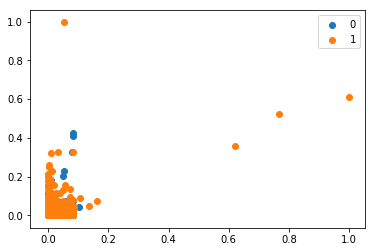

In [37]:
groups = df.groupby('label')
fig, ax = plt.subplots()
for pred_class, group in groups:
    ax.scatter(group.students_reached, group.total_price_including_optional_support, label=pred_class)
ax.legend()
plt.show()

### Show the summary of each cluster

In [38]:
avg_table, count_table = kmeans.summarize(df,'label')

### Mean table

In [39]:
avg_table

,label,0,1
school_latitude,mean,36.31267717748816,37.142624546914675
school_longitude,mean,-95.53153410394792,-96.0601475161379
total_price_including_optional_support,mean,0.0034549031787234888,0.0033999582391226186
students_reached,mean,0.007959518794541898,0.0076633667593611525
school_city_Abbeville,mean,0.0005896598925976624,0.0005290937012040108
school_city_Aberdeen,mean,6.317784563546383e-05,0.00021938031513337033
school_city_Abilene,mean,0.0,0.00024518976397259036
school_city_Abingdon,mean,0.0,2.580944883922004e-05
school_city_Abington,mean,4.211856375697589e-05,0.0
school_city_Abita Springs,mean,0.0,0.0001419519686157102


### Count_table

In [40]:
count_table

label
0    47485
1    77491
Name: label, dtype: int64

### The distinctive features of data points in this cluster

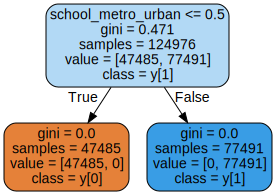

In [41]:
kmeans.viz(df, features, 'label', 1, 5)

### drop one continuous var, then check the change

In [51]:
features.remove('school_metro_urban')

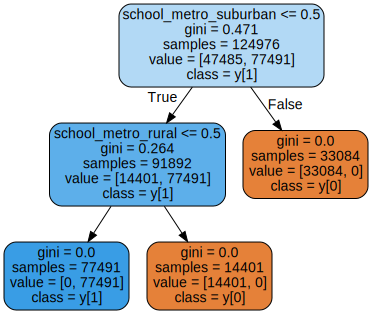

In [52]:
kmeans.viz(df, features, 'label', 1, 5)

## merge clusters into one
Before merge we have two labels 0,1. after merging, only one new label 5 left.

In [53]:
kmeans.merge_clusters(df, 5, [0, 1])['label'].unique()

array([5])

## recluster with a new k

In [54]:
df['label'] = kmeans.label(4, df[features])
df.label.unique()

array([1, 3, 2, 0])

## Split a specific cluster into many cluster

In [55]:
df = kmeans.split_cluster(df, features, 1, 5)
df.label.unique()

array([6, 5, 7, 8, 4, 3, 2, 0])

### As we can see here the cluster 1 disappears, and split it into 5 new cluster : 4,5,6,7,8

## top5 analysis

In [75]:
data = lo.load('../data/top5.csv')

In [76]:
data['date_posted'] = pd.to_datetime(df['date_posted'])
data['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
pro.fill_median(data, ['students_reached'])
pro.fill_most(data, ['school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level'])
data.drop(['projectid','teacher_acctid','schoolid','school_ncesid'], axis =1, inplace=True)
cat_cols = ['school_city', 'school_state', 
            'school_metro','school_charter',
            'primary_focus_subject','primary_focus_area', 
            'grade_level','resource_type']
data = fe.dummize(data, cat_cols)
minmax.min_max(data,['total_price_including_optional_support', 'students_reached'])
features = []
for item in data.columns:
    if 'school_metro' in item\
    or 'school_charter' in item\
    or 'grade_level_Grades' in item\
    or 'resource_type' in item\
    or 'primary_focus_subject' in item:
        features.append(item)
features.extend(['total_price_including_optional_support', 'students_reached'])

In [77]:
data['label'] = kmeans.label(2, data[features])

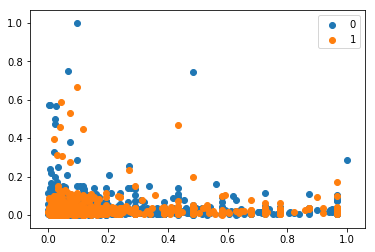

In [78]:
groups = data.groupby('label')
fig, ax = plt.subplots()
for pred_class, group in groups:
    ax.scatter(group.students_reached, group.total_price_including_optional_support, label=pred_class)
ax.legend()
plt.show()

In [79]:
avg_tab, count_tab = kmeans.summarize(data,'label')

In [80]:
avg_tab

,label,0,1
Unnamed: 0,mean,62516.73016283278,63132.505042016805
school_latitude,mean,37.1321248436289,36.41265943067219
school_longitude,mean,-95.8434072597571,-95.6071955369748
total_price_including_optional_support,mean,0.02218743075664355,0.02177804589597184
students_reached,mean,0.0918655311600407,0.08762276976746107
school_city_Abbeville,mean,0.0007753941586973378,0.0
school_city_Abilene,mean,0.0007753941586973378,0.0
school_city_Adams Center,mean,0.0,0.0004201680672268908
school_city_Adel,mean,0.0002584647195657793,0.0
school_city_Adelanto,mean,0.0,0.0004201680672268908


In [81]:
count_tab

label
0    3869
1    2380
Name: label, dtype: int64

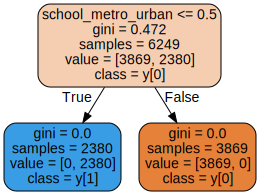

In [83]:
kmeans.viz(data, features, 'label', 1, 5)

In [84]:
features.remove('school_metro_urban')

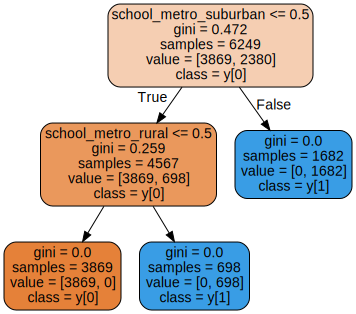

In [85]:
kmeans.viz(data, features, 'label', 1, 5)